In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

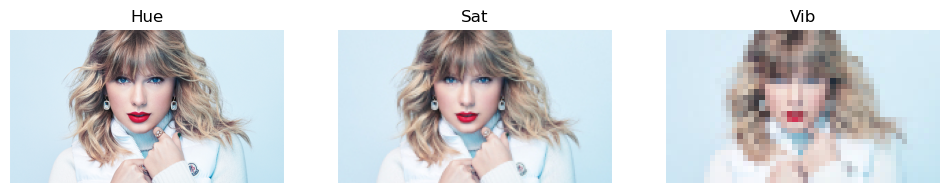

In [42]:
taylor_original = cv2.imread("a1images/a1q8images/taylor.jpg")
taylor_small = cv2.imread("a1images/a1q8images/taylor_small.jpg")
taylor_xsmall = cv2.imread("a1images/a1q8images/taylor_very_small.jpg")

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(taylor_original,cv2.COLOR_BGR2RGB))
plt.title('Hue')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(taylor_small,cv2.COLOR_BGR2RGB))
plt.title('Sat')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(taylor_xsmall,cv2.COLOR_BGR2RGB))
plt.title('Vib')
plt.axis('off')

plt.show()

In [43]:
def zoom_nearest(img, scale):
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)

    for i in range(new_h):
        for j in range(new_w):
            src_x = int(i / scale)
            src_y = int(j / scale)
            zoomed[i, j] = img[src_x, src_y]

    return zoomed

In [44]:
def zoom_bilinear(img, scale):
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            x = i / scale
            y = j / scale

            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0 + 1, h - 1), min(y0 + 1, w - 1)

            dx, dy = x - x0, y - y0

            top = (1 - dy) * img[x0, y0] + dy * img[x0, y1]
            bottom = (1 - dy) * img[x1, y0] + dy * img[x1, y1]
            zoomed[i, j] = (1 - dx) * top + dx * bottom

    return np.clip(zoomed, 0, 255).astype(np.uint8)

In [45]:
def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    ssd = np.sum((img1 - img2) ** 2)
    norm_ssd = ssd / np.sum(img1 ** 2)
    return norm_ssd

In [46]:
scale_factor = 4
zoomed_nn = zoom_nearest(taylor_small, scale_factor)
zoomed_bilinear = zoom_bilinear(taylor_small, scale_factor)

In [47]:
orig_resized = cv2.resize(taylor_original, (zoomed_nn.shape[1], zoomed_nn.shape[0]))

ssd_nn = normalized_ssd(orig_resized, zoomed_nn)
ssd_bilinear = normalized_ssd(orig_resized, zoomed_bilinear)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bilinear)

Normalized SSD - Nearest Neighbor: 0.003815712
Normalized SSD - Bilinear: 0.004740614


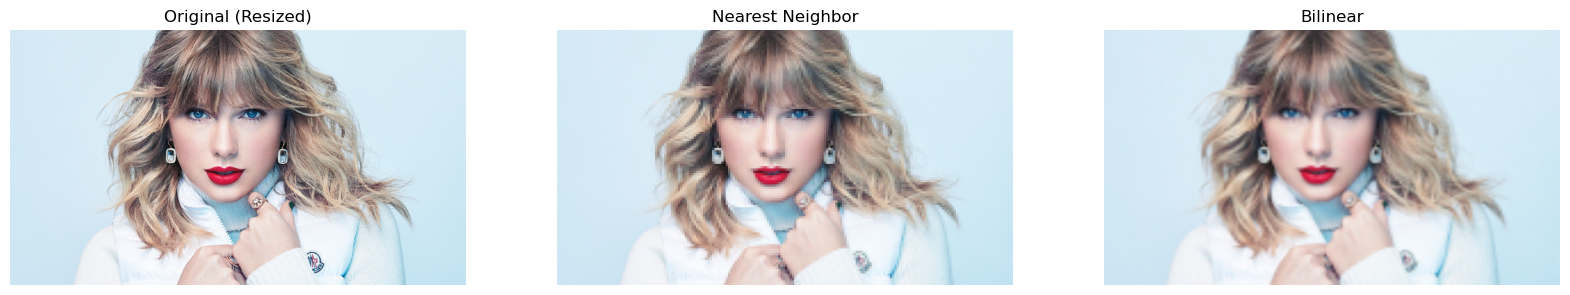

In [48]:
plt.figure(figsize=(20,12)) 
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(orig_resized, cv2.COLOR_BGR2RGB)); plt.title("Original (Resized)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB)); plt.title("Nearest Neighbor"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear"); plt.axis("off")
plt.show()

Normalized SSD - Nearest Neighbor: 0.011207108
Normalized SSD - Bilinear: 0.013825314


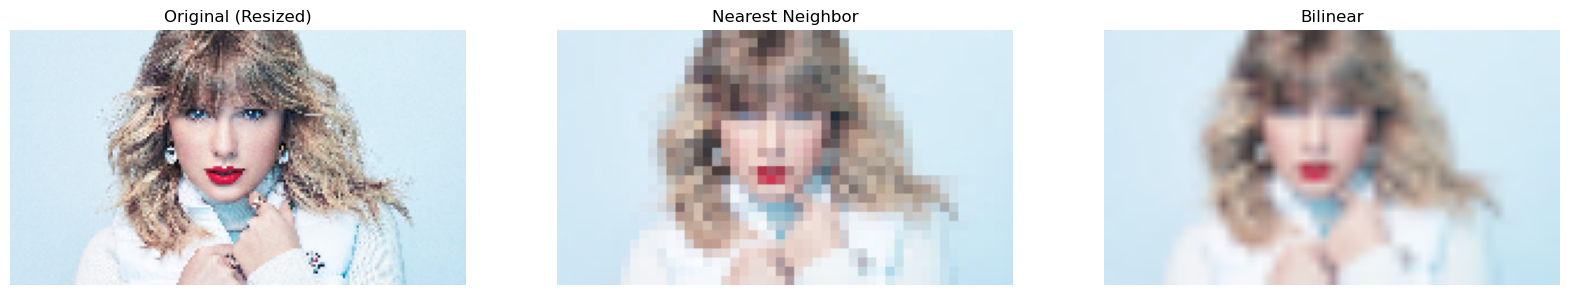

In [49]:
scale_factor = 4
zoomed_nn = zoom_nearest(taylor_xsmall, scale_factor)
zoomed_bilinear = zoom_bilinear(taylor_xsmall, scale_factor)

orig_resized = cv2.resize(taylor_original, (zoomed_nn.shape[1], zoomed_nn.shape[0]))

ssd_nn = normalized_ssd(orig_resized, zoomed_nn)
ssd_bilinear = normalized_ssd(orig_resized, zoomed_bilinear)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bilinear)

plt.figure(figsize=(20,12)) 
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(orig_resized, cv2.COLOR_BGR2RGB)); plt.title("Original (Resized)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB)); plt.title("Nearest Neighbor"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear"); plt.axis("off")
plt.show()

Normalized SSD - Nearest Neighbor: 0.012057949
Normalized SSD - Bilinear: 0.017718948


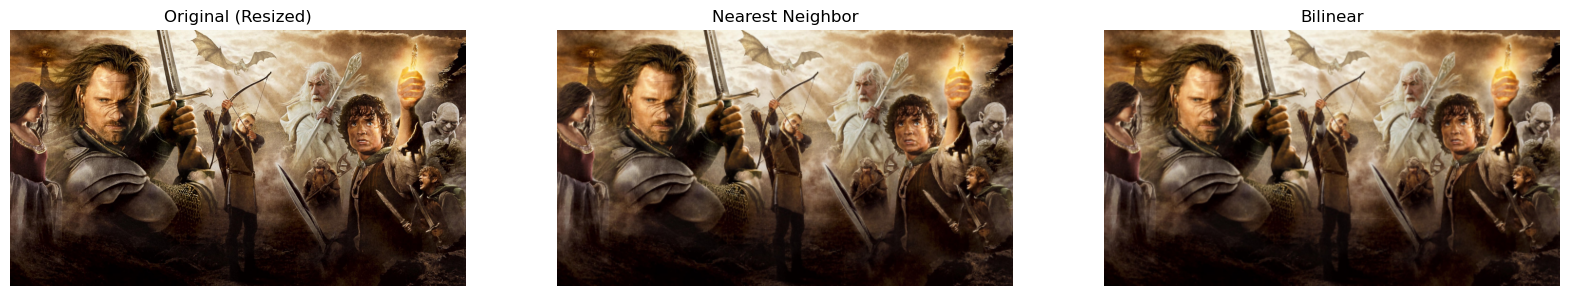

In [50]:
LOR_original = cv2.imread("a1images/a1q8images/im01.png")
LOR_small = cv2.imread("a1images/a1q8images/im01small.png")

scale_factor = 4
zoomed_nn = zoom_nearest(LOR_small, scale_factor)
zoomed_bilinear = zoom_bilinear(LOR_small, scale_factor)

orig_resized = cv2.resize(LOR_original, (zoomed_nn.shape[1], zoomed_nn.shape[0]))

ssd_nn = normalized_ssd(orig_resized, zoomed_nn)
ssd_bilinear = normalized_ssd(orig_resized, zoomed_bilinear)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bilinear)

plt.figure(figsize=(20,12)) 
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(orig_resized, cv2.COLOR_BGR2RGB)); plt.title("Original (Resized)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB)); plt.title("Nearest Neighbor"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear"); plt.axis("off")
plt.show()

Normalized SSD - Nearest Neighbor: 0.0041900394
Normalized SSD - Bilinear: 0.00775718


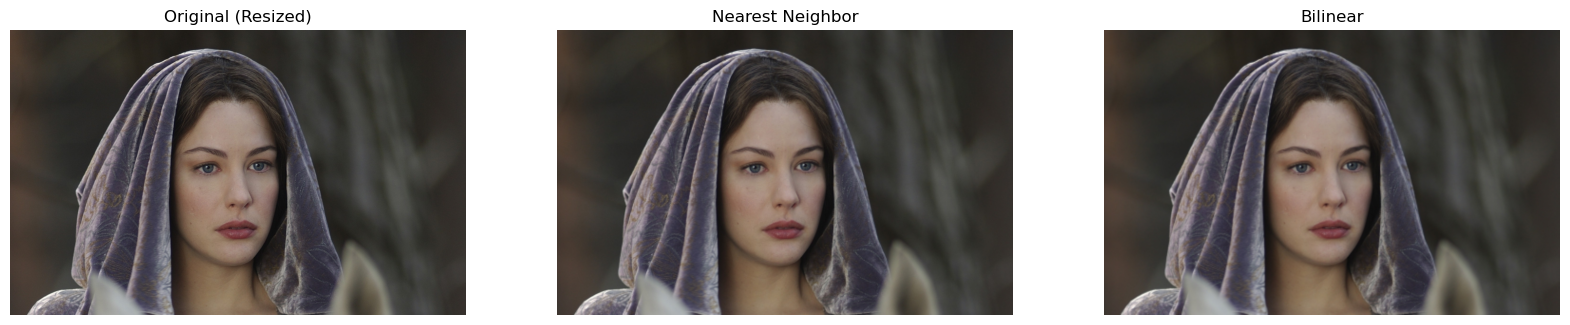

In [51]:
arwen_original = cv2.imread("a1images/a1q8images/im02.png")
arwen_small = cv2.imread("a1images/a1q8images/im02small.png")

scale_factor = 4
zoomed_nn = zoom_nearest(arwen_small, scale_factor)
zoomed_bilinear = zoom_bilinear(arwen_small, scale_factor)

orig_resized = cv2.resize(arwen_original, (zoomed_nn.shape[1], zoomed_nn.shape[0]))

ssd_nn = normalized_ssd(orig_resized, zoomed_nn)
ssd_bilinear = normalized_ssd(orig_resized, zoomed_bilinear)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bilinear)

plt.figure(figsize=(20,12)) 
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(orig_resized, cv2.COLOR_BGR2RGB)); plt.title("Original (Resized)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB)); plt.title("Nearest Neighbor"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)); plt.title("Bilinear"); plt.axis("off")
plt.show()